In [1]:
using Distances
using LinearAlgebra
using Plots
using Ripserer

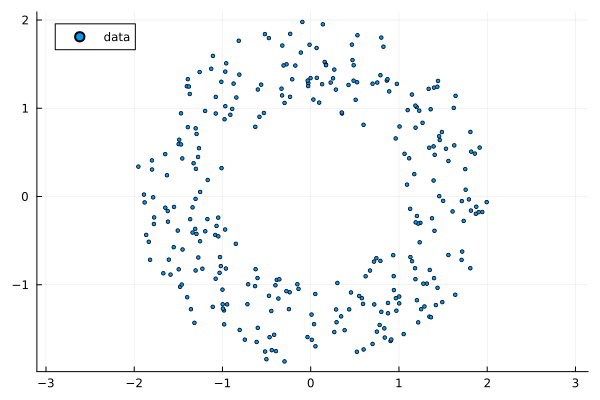

In [2]:
function annulus(n, r1=1, r2=2, offset=(0, 0))
    result = Tuple{Float64,Float64}[]
    while length(result) < n
        point = 2 * r2 * rand(2) .- r2
        if r1 < norm(point) < r2
            push!(result, (point[1] + offset[1], point[2] + offset[2]))
        end
    end
    return result
end

data = annulus(300)

scatter(data; label="data", markersize=2, aspect_ratio=1)

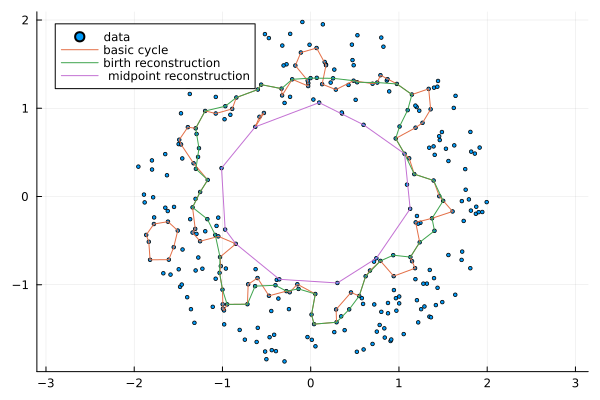

In [5]:
diagram_cycles = ripserer(data; alg=:involuted)
most_persistent_ho = diagram_cycles[2][end]

diagram_cocycles = ripserer(data; reps=true)
most_persistent_co = diagram_cocycles[2][end]

filtration = diagram_cocycles[2].filtration
reconstructed_at_birth = reconstruct_cycle(filtration, most_persistent_co)

midpoint = (death(most_persistent_co) - birth(most_persistent_co)) / 2
reconstructed_at_midpoint = reconstruct_cycle(filtration, most_persistent_co, midpoint)

scatter(data; label="data", markersize=2, aspect_ratio=1)
plot!(most_persistent_ho, data; label="basic cycle")
plot!(reconstructed_at_birth, data; label="birth reconstruction")
plot!(reconstructed_at_midpoint, data; label=" midpoint reconstruction")

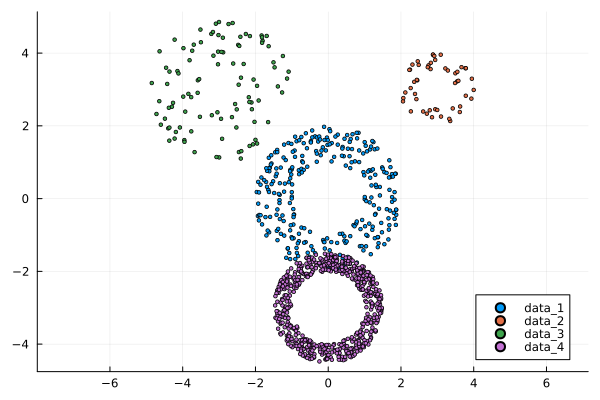

In [11]:
function ann_1(n, r1=1, r2=2, offset=(0, 0))
    result = Tuple{Float64,Float64}[]
    while length(result) < n
        point = 2 * r2 * rand(2) .- r2
        if r1 < norm(point) < r2
            push!(result, (point[1] + offset[1], point[2] + offset[2]))
        end
    end
    return result
end

function ann_2(n, r1=0.5, r2=1, offset=(3, 3))
    result = Tuple{Float64,Float64}[]
    while length(result) < n
        point = 2 * r2 * rand(2) .- r2
        if r1 < norm(point) < r2
            push!(result, (point[1] + offset[1], point[2] + offset[2]))
        end
    end
    return result
end

function ann_3(n, r1=0.5, r2=2, offset=(-3, 3))
    result = Tuple{Float64,Float64}[]
    while length(result) < n
        point = 2 * r2 * rand(2) .- r2
        if r1 < norm(point) < r2
            push!(result, (point[1] + offset[1], point[2] + offset[2]))
        end
    end
    return result
end

function ann_4(n, r1=1, r2=1.5, offset=(0, -3))
    result = Tuple{Float64,Float64}[]
    while length(result) < n
        point = 2 * r2 * rand(2) .- r2
        if r1 < norm(point) < r2
            push!(result, (point[1] + offset[1], point[2] + offset[2]))
        end
    end
    return result
end

data_1 = ann_1(300)
data_2 = ann_2(50)
data_3 = ann_3(100)
data_4 = ann_4(600)

scatter(data_1; label="data_1", markersize=2, aspect_ratio=1)
scatter!(data_2; label="data_2", markersize=2, aspect_ratio=1)
scatter!(data_3; label="data_3", markersize=2, aspect_ratio=1)
scatter!(data_4; label="data_4", markersize=2, aspect_ratio=1)

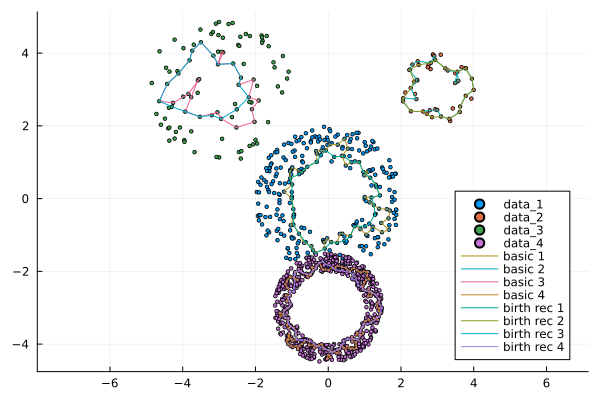

In [12]:
diagram_cycles_1 = ripserer(data_1; alg=:involuted)
diagram_cycles_2 = ripserer(data_2; alg=:involuted)
diagram_cycles_3 = ripserer(data_3; alg=:involuted)
diagram_cycles_4 = ripserer(data_4; alg=:involuted)

most_persistent_ho_1 = diagram_cycles_1[2][end]
most_persistent_ho_2 = diagram_cycles_2[2][end]
most_persistent_ho_3 = diagram_cycles_3[2][end]
most_persistent_ho_4 = diagram_cycles_4[2][end]

plot!(most_persistent_ho_1, data_1; label="basic 1")
plot!(most_persistent_ho_2, data_2; label="basic 2")
plot!(most_persistent_ho_3, data_3; label="basic 3")
plot!(most_persistent_ho_4, data_4; label="basic 4")

diagram_cocycles_1 = ripserer(data_1; reps=true)
diagram_cocycles_2 = ripserer(data_2; reps=true)
diagram_cocycles_3 = ripserer(data_3; reps=true)
diagram_cocycles_4 = ripserer(data_4; reps=true)

most_persistent_co_1 = diagram_cocycles_1[2][end]
most_persistent_co_2 = diagram_cocycles_2[2][end]
most_persistent_co_3 = diagram_cocycles_3[2][end]
most_persistent_co_4 = diagram_cocycles_4[2][end]

filtration_1 = diagram_cocycles_1[2].filtration
filtration_2 = diagram_cocycles_2[2].filtration
filtration_3 = diagram_cocycles_3[2].filtration
filtration_4 = diagram_cocycles_4[2].filtration

b_reconstructed_1 = reconstruct_cycle(filtration_1, most_persistent_co_1)
b_reconstructed_2 = reconstruct_cycle(filtration_2, most_persistent_co_2)
b_reconstructed_3 = reconstruct_cycle(filtration_3, most_persistent_co_3)
b_reconstructed_4 = reconstruct_cycle(filtration_4, most_persistent_co_4)

plot!(b_reconstructed_1, data_1; label="birth rec 1")
plot!(b_reconstructed_2, data_2; label="birth rec 2")
plot!(b_reconstructed_3, data_3; label="birth rec 3")
plot!(b_reconstructed_4, data_4; label="birth rec 4")

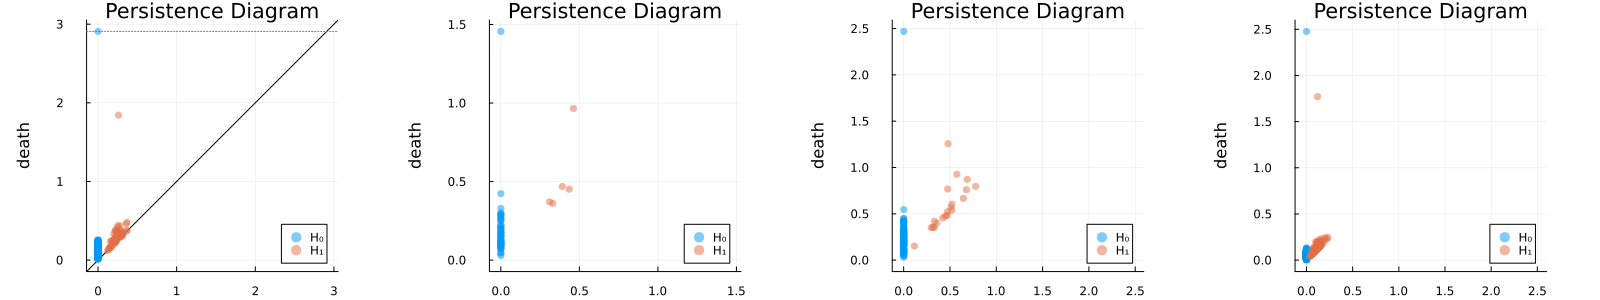

In [43]:
diagram_1 = ripserer(data_1)
diagram_2 = ripserer(data_2)
diagram_3 = ripserer(data_3)
diagram_4 = ripserer(data_4)

plot(layout=(1, 4), size=(1600, 300))

plot!(diagram_1, subplot=1)
plot!(diagram_2, subplot=2)
plot!(diagram_3, subplot=3)
plot!(diagram_4, subplot=4)

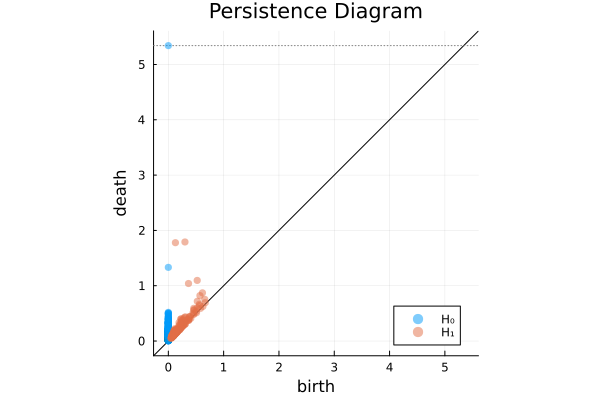

In [21]:
data_comb = vcat(data_1, data_2, data_3, data_4)
diagram_comb = ripserer(data_combined)
plot(diagram_comb)

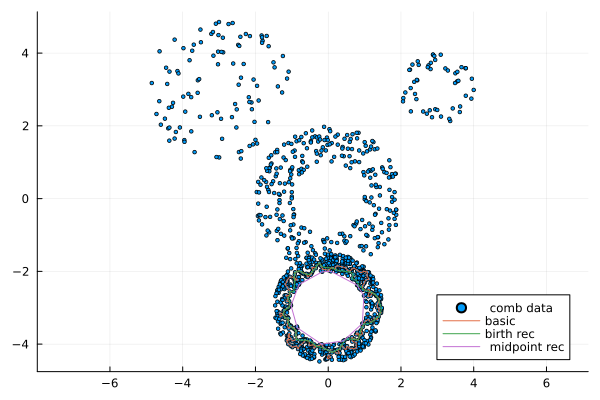

In [22]:
diagram_cycles_comb = ripserer(data_comb; alg=:involuted)
most_persistent_ho_comb = diagram_cycles_comb[2][end]

diagram_cocycles_comb = ripserer(data_comb; reps=true)
most_persistent_co_comb = diagram_cocycles_comb[2][end]

filtration_comb = diagram_cocycles_comb[2].filtration
reconstructed_at_birth_comb = reconstruct_cycle(filtration_comb, most_persistent_co_comb)

midpoint_comb = (death(most_persistent_co_comb) - birth(most_persistent_co_comb)) / 2
reconstructed_at_midpoint_comb = reconstruct_cycle(filtration_comb, most_persistent_co_comb, midpoint_comb)

scatter(data_comb; label=" comb data", markersize=2, aspect_ratio=1)
plot!(most_persistent_ho_comb, data_comb; label="basic")
plot!(reconstructed_at_birth_comb, data_comb; label="birth rec")
plot!(reconstructed_at_midpoint_comb, data_comb; label=" midpoint rec")

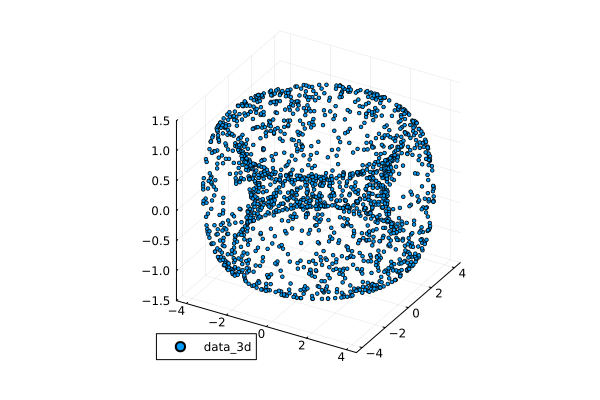

In [23]:
function torus(n, R, r; noise=0.0)
    θ = rand(n) .* 2π
    φ = rand(n) .* 2π
    x = (R .+ r .* cos.(θ)) .* cos.(φ)
    y = (R .+ r .* cos.(θ)) .* sin.(φ)
    z = r .* sin.(θ)
    if noise > 0
        x .+= noise .* randn(n)
        y .+= noise .* randn(n)
        z .+= noise .* randn(n)
    end
    hcat(x, y, z)
end

data_3d = torus(2000, 4, 1)

scatter(data_3d[:,1], data_3d[:,2], data_3d[:,3];
    label="data_3d", markersize=2,
    xlims = (-4.5, 4.5), ylims = (-4.5, 4.5), zlims = (-1.5, 1.5),
    aspect_ratio=:equal)

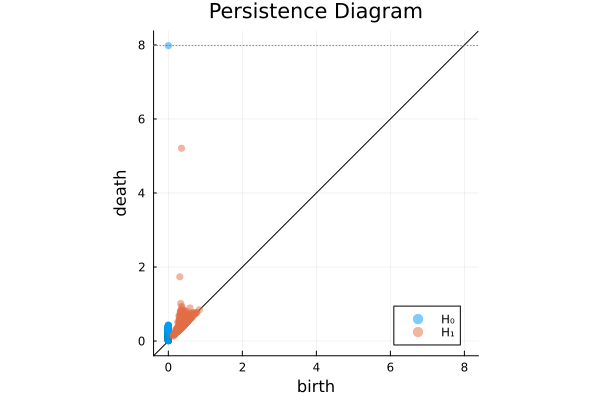

In [15]:
distance_matrix = pairwise(Euclidean(), data_3d, dims=1)
diagram_3d = ripserer(distance_matrix)
plot(diagram_3d)